In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import numpy as np 

In [23]:
df = pd.read_csv("./data/HistoricalQuotes.csv")
display(df.describe(), df, df.shape, df.dtypes)

,Volume
count,2.518000e+03
mean,7.258009e+07
std,5.663113e+07
min,1.136205e+07
25%,3.053026e+07
50%,5.295469e+07
75%,9.861006e+07
max,4.624423e+08


,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


(2518, 6)

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [24]:
# Convert 'Date' to datetime 
df['Date'] = pd.to_datetime(df['Date']) 
 
# Remove $ from price columns and convert to float 
price_columns = [' Close/Last', ' Open', ' High', ' Low'] 
for col in price_columns: 
    df[col] = df[col].str.replace('$', '').astype(float) 
 
# Check the data types again 
print(df.dtypes)

Date           datetime64[ns]
 Close/Last           float64
 Volume                 int64
 Open                 float64
 High                 float64
 Low                  float64
dtype: object


In [25]:
print(df.isnull().sum())

Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64


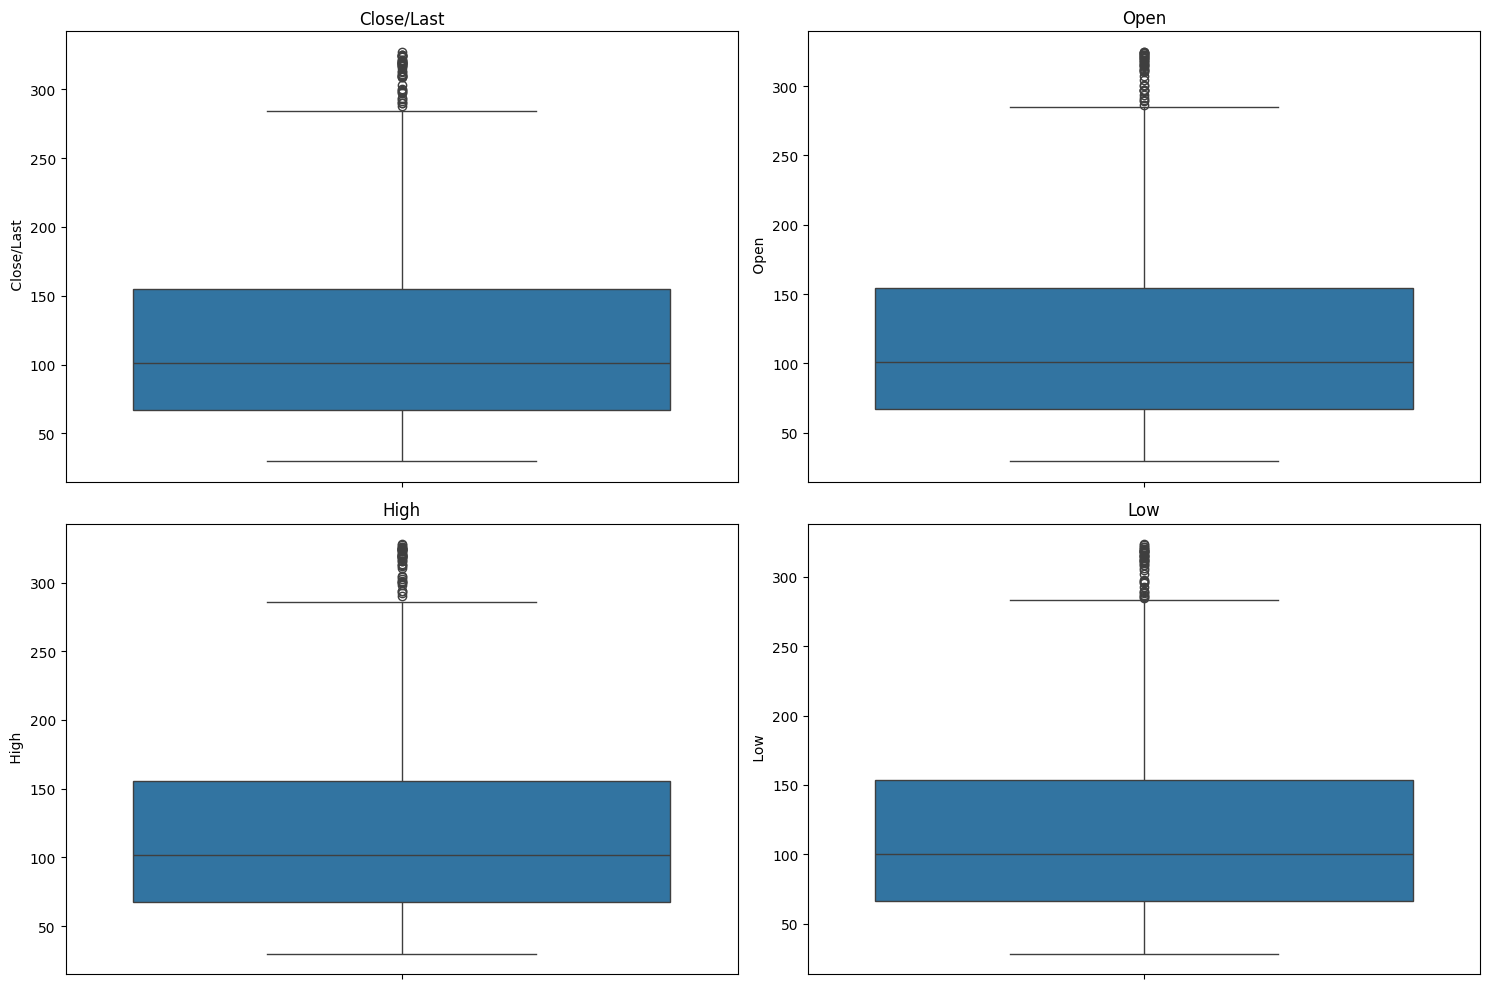

In [26]:
# Set up the matplotlib figure 
f, axes = plt.subplots(2, 2, figsize=(15, 10)) 
 
# Plot a simple histogram with binsize determined automatically 
sns.boxplot(data=df[' Close/Last'], ax=axes[0, 0]) 
axes[0, 0].set_title('Close/Last') 
 
sns.boxplot(data=df[' Open'], ax=axes[0, 1]) 
axes[0, 1].set_title('Open') 
 
sns.boxplot(data=df[' High'], ax=axes[1, 0]) 
axes[1, 0].set_title('High') 
 
sns.boxplot(data=df[' Low'], ax=axes[1, 1]) 
axes[1, 1].set_title('Low') 
 
plt.tight_layout() 

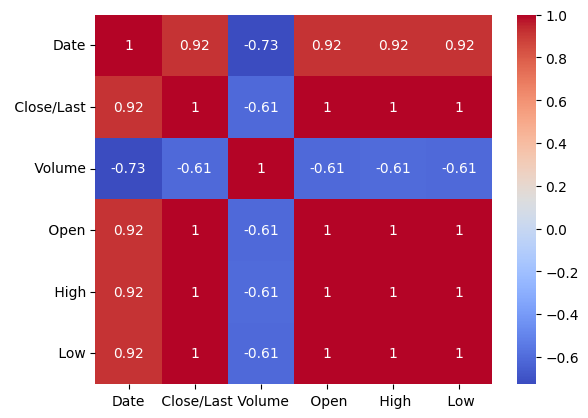

In [27]:
# Calculate the correlation matrix 
corr = df.corr() 
 
# Plot the heatmap 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
 
plt.show() 


In [28]:
from sklearn.model_selection import train_test_split 
 
# Define the feature variables and the target variable 
X = df.drop(' Close/Last', axis=1) 
y = df[' Close/Last'] 
 
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Print the shape of the training set and the test set 
print("Training set (X):", X_train.shape) 
print("Training set (y):", y_train.shape) 
print("Test set (X):", X_test.shape) 
print("Test set (y):", y_test.shape) 

Training set (X): (2014, 5)
Training set (y): (2014,)
Test set (X): (504, 5)
Test set (y): (504,)


In [ ]:
# Create a Linear Regression model 
model = LinearRegression() 
 
# Extract features from 'Date' 
X_train['Year'] = X_train['Date'].dt.year 
X_train['Month'] = X_train['Date'].dt.month 
X_train['Day'] = X_train['Date'].dt.day 
 
# Drop the original 'Date' column 
X_train = X_train.drop('Date', axis=1) 
 
# Do the same for the test set 
X_test['Year'] = X_test['Date'].dt.year 
X_test['Month'] = X_test['Date'].dt.month 
X_test['Day'] = X_test['Date'].dt.day 
X_test = X_test.drop('Date', axis=1) 

In [31]:
model.fit(X_train, y_train) 

LinearRegression()

In [32]:
# Make predictions on the test data 
y_pred = model.predict(X_test) 
 
# Calculate MAE, MSE, RMSE, and R2 
mae = metrics.mean_absolute_error(y_test, y_pred) 
mse = metrics.mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) # or metrics.mean_squared_error(y_test, y_pred, squared=False) 
r2 = metrics.r2_score(y_test, y_pred) 
 
# Print the metrics 
print("Mean Absolute Error (MAE):", mae) 
print("Mean Squared Error (MSE):", mse) 
print("Root Mean Squared Error (RMSE):", rmse) 
print("R-squared (R2 ):", r2) 


Mean Absolute Error (MAE): 0.458844690389933
Mean Squared Error (MSE): 0.4236006011305136
Root Mean Squared Error (RMSE): 0.6508460656180642
R-squared (R2 ): 0.999868004623502


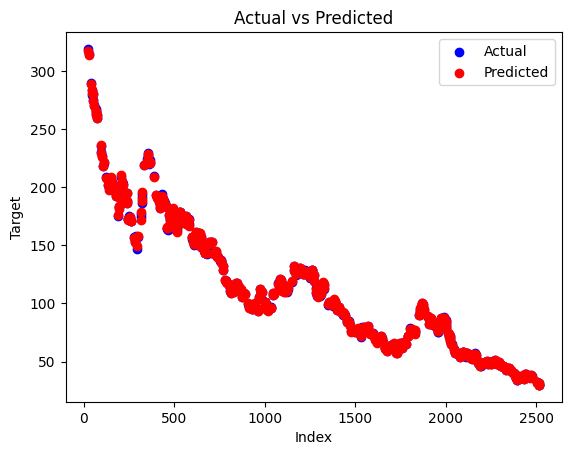

In [33]:
import matplotlib.pyplot as plt 
 
# Plot the actual values 
plt.scatter(X_test.index, y_test, color='blue', label='Actual') 
 
# Plot the predicted values 
plt.scatter(X_test.index, y_pred, color='red', label='Predicted') 
 
plt.title('Actual vs Predicted') 
plt.xlabel('Index') 
plt.ylabel('Target') 
plt.legend() 
plt.show()
